In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
wine=load_wine()

In [3]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### 数据拆分，训练集与测试集

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(wine.data,wine.target,test_size=0.3)

In [8]:
train_test_split?

In [57]:
clf=DecisionTreeClassifier(criterion='gini',random_state=30,splitter='best')
clf=clf.fit(xtrain,ytrain)
score=clf.score(xtest,ytest)
score

0.8888888888888888

In [38]:
score

0.8703703703703703

### 数据结果展示

In [11]:
! pip install graphviz

Looking in indexes: http://pypi.douban.com/simple


In [12]:
import graphviz

In [13]:
tree.export_graphviz?

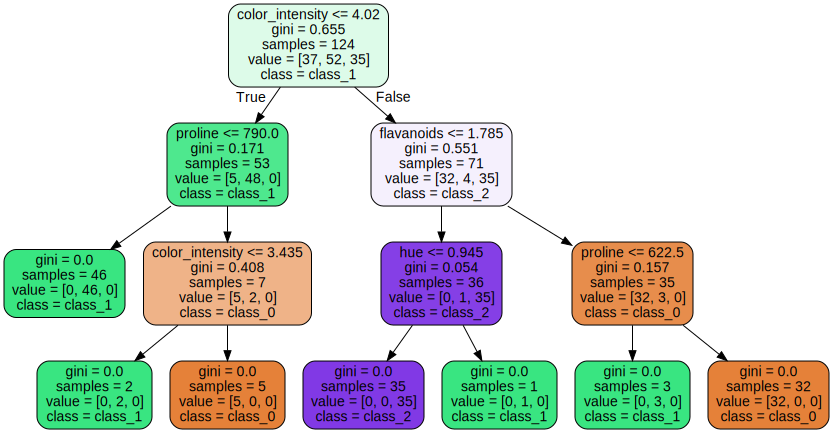

In [58]:
dot_data=tree.export_graphviz(clf,out_file=None
                              ,feature_names=list(wine.feature_names)
                              ,class_names=list(wine.target_names)
                              ,filled=True,rounded=True)
graph=graphviz.Source(dot_data)
graph

### 查看特征重要性
- 方法1：

In [31]:
[*zip(clf.feature_importances_,wine.feature_names)]

[(0.0, 'alcohol'),
 (0.0, 'malic_acid'),
 (0.02392450001102512, 'ash'),
 (0.0, 'alcalinity_of_ash'),
 (0.0, 'magnesium'),
 (0.0, 'total_phenols'),
 (0.0, 'flavanoids'),
 (0.0, 'nonflavanoid_phenols'),
 (0.0, 'proanthocyanins'),
 (0.44265146797464877, 'color_intensity'),
 (0.0, 'hue'),
 (0.38964930239859025, 'od280/od315_of_diluted_wines'),
 (0.14377472961573576, 'proline')]

- 方法2

In [16]:
feature_importances=list(clf.feature_importances_)
feature_names=list(wine.feature_names)

In [66]:
del feature_importances_data

In [78]:
import pandas as pd
feature_importances_data=pd.concat([pd.Series(feature_importances),pd.Series(feature_names)],axis=1,names=['feature_importance','feature_names'])

In [79]:
feature_importances_data

,0,1
0,0.000000,alcohol
1,0.000000,malic_acid
2,0.023925,ash
3,0.000000,alcalinity_of_ash
4,0.000000,magnesium
5,0.000000,total_phenols
6,0.000000,flavanoids
7,0.000000,nonflavanoid_phenols
8,0.000000,proanthocyanins
9,0.442651,color_intensity


In [75]:
type(feature_importances_data)

pandas.core.frame.DataFrame

In [74]:
pd.concat?

### 调参
- 1.剪枝：
- max_depth(最大深度,设置后模型的最大深度会达到设置要求)：高纬度低样本非常有效，3开始使用
- min_samples_leaf(最大叶子节点样本数)，5开始使用
- max_features:限制高纬度过拟合
- min_impurity_decrease：限制信息增益大小，信息增益是父节点信息熵减去子节点信息熵，再sklearn 0.19版本前用 min_impurity_split

score: 0.7777777777777778


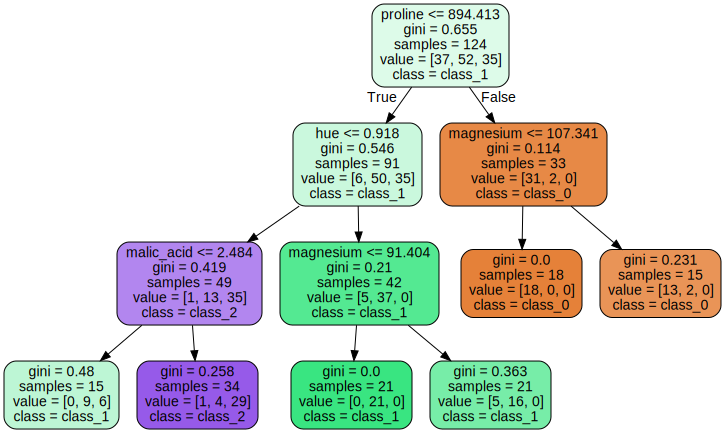

In [165]:
clf2=DecisionTreeClassifier(criterion='gini',splitter='random'
                            ,max_depth=3
                            ,min_samples_leaf=10
                           )
clf2=clf2.fit(xtrain,ytrain)
score=clf2.score(xtest,ytest)
print("score:",score)
dot_data=tree.export_graphviz(clf2,out_file=None
                              ,feature_names=list(wine.feature_names)
                              ,class_names=list(wine.target_names)
                              ,filled=True,rounded=True)
graph=graphviz.Source(dot_data)
graph

In [177]:
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
%matplotlib inline

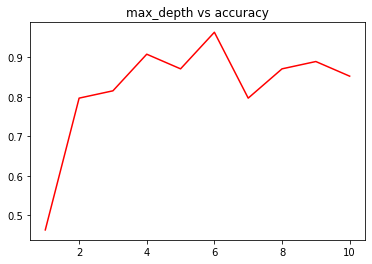

In [183]:
score_result=[]
for i in range(10):
    clf2=DecisionTreeClassifier(criterion='gini',splitter='random'
                            ,max_depth=i+1
                            #,min_samples_leaf=10
                           )
    clf2=clf2.fit(xtrain,ytrain)
    score=clf2.score(xtest,ytest)
    score_result.append(score)
plot(range(1,11),score_result,color='red',label='max_depth')
plt.title('max_depth vs accuracy')
plt.show()

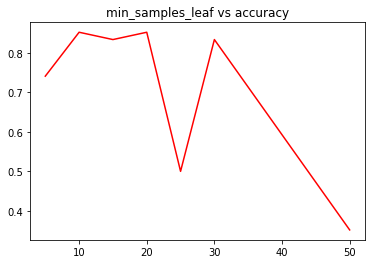

In [190]:
score_result2=[]
for i in [5,10,15,20,25,30,50]:
    clf3=DecisionTreeClassifier(criterion='gini',splitter='random'
                            ,max_depth=4
                            ,min_samples_leaf=i
                           )
    clf3=clf3.fit(xtrain,ytrain)
    score=clf3.score(xtest,ytest)
    score_result2.append(score)
plot([5,10,15,20,25,30,50],score_result2,color='red',label='min_samples_leaf')
plt.title('min_samples_leaf vs accuracy')
plt.show()

In [200]:
clf4=DecisionTreeClassifier(criterion='gini',splitter='random'
                            ,max_depth=4
                            ,min_samples_leaf=10
                           )
clf4=clf4.fit(xtrain,ytrain)
score=clf4.score(xtest,ytest)
print(score)

0.7777777777777778
